In [1]:
import sklearn
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier

In [3]:
data = pd.read_csv('breast-cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:

X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#labelencoder_Y = LabelEncoder()
#data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [7]:
# Initialize base classifiers
lr = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
svm = SVC(probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [8]:
# Step 2: Bagging with Random Forest
bagged_rf = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)


In [9]:
# Step 3: Boosting with AdaBoost
ada = AdaBoostClassifier(estimator=rf, n_estimators=50, random_state=42)


In [10]:
# Step 4: Stacking
estimators = [
    ('lr', lr),
    ('svm', svm),
    ('knn', knn),
    ('bagged_rf', bagged_rf)
]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


In [11]:
# Step 5: Voting
ensemble_model = VotingClassifier(estimators=[
    ('bagged_rf', bagged_rf),
    ('ada', ada),
    ('stacked', stacked_model)
], voting='soft')


In [12]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

c:\Users\maddu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
# Calculate confusion matrix for ensemble model
confusion_ensemble = confusion_matrix(y_test, y_pred)

In [15]:
# Calculate metrics for ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred)
precision_ensemble = precision_score(y_test, y_pred,pos_label="M")
recall_ensemble = recall_score(y_test, y_pred,pos_label="M")
f1_ensemble = f1_score(y_test, y_pred,pos_label="M")


In [16]:

# Print confusion matrix and metrics for ensemble model
print("Confusion Matrix (Ensemble Model):")
print(confusion_ensemble)
print("\nMetrics for Ensemble Model:")
print("Accuracy:", accuracy_ensemble*100)
print("Precision:", precision_ensemble*100)
print("Recall:", recall_ensemble*100)
print("F1-score:", f1_ensemble*100)

Confusion Matrix (Ensemble Model):
[[70  1]
 [ 3 40]]

Metrics for Ensemble Model:
Accuracy: 96.49122807017544
Precision: 97.5609756097561
Recall: 93.02325581395348
F1-score: 95.23809523809523


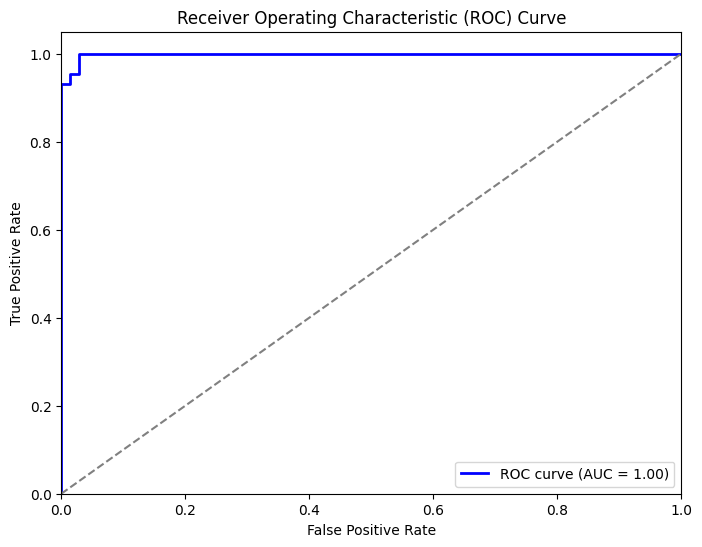

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob,pos_label='M')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [32]:
print("Area Under ROC Curve: %0.2f" % roc_auc)


Area Under ROC Curve: 1.00
